# Importing Libraries

In [1]:
# packages

# standard
import numpy as np
import pandas as pd
import time 

# plots
import matplotlib.pyplot as plt
import seaborn as sns

# string functions
import string


# NLTK
import re
import nltk
from nltk import word_tokenize, bigrams
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

# ML


# other stuff
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

# ABOUT DATASET

- This dataset contains information  in excel format which comprises around 1.6 Million rows of data from social media, Facebook comments, posts, etc.
-  All the people selected for data annotation are very well in English Language
- There are two columns in this dataset. Text and labels are the two types
- Normal and anxiety/depression text is present in the text columns, and the label column indicates whether the corresponding text denotes anxiety or depression.

In [2]:
df1 = pd.read_csv('data2.csv', encoding='latin-1')
df1

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [3]:
df1.columns=['label', 'id', 'Date', 'Query', 'User', 'Text']
df1 = df1.drop(columns=['id', 'Date', 'Query', 'User'], axis=1)
df1.label = df1.label.apply(lambda x: np.float64(3) if x==0 else np.float64(x))
df1.label = df1.label.apply(lambda x: np.float64(2) if x==4 else np.float64(x))


In [4]:
df1.columns

Index(['label', 'Text'], dtype='object')

In [60]:
df1.label = df1.label.apply(lambda x: np.float64(1) if x==3 else np.float64(x))
df1.label = df1.label.apply(lambda x: np.float64(0) if x==2 else np.float64(x))
df_top = df1.head(12000)
df_bottom = df1.tail(12000)
df = pd.concat([df_top, df_bottom])

# Dataset Summary


In [61]:
print(f"Shape of The Dataset : {df.shape}")
print(f"\nGlimpse of The Dataset :")
df.head()


Shape of The Dataset : (24000, 2)

Glimpse of The Dataset :


,label,Text
0,1.0,is upset that he can't update his Facebook by ...
1,1.0,@Kenichan I dived many times for the ball. Man...
2,1.0,my whole body feels itchy and like its on fire
3,1.0,"@nationwideclass no, it's not behaving at all...."
4,1.0,@Kwesidei not the whole crew


In [62]:
print(f"About Dataset :\n")
print(df.info())

About Dataset :

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24000 entries, 0 to 1599998
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   24000 non-null  float64
 1   Text    24000 non-null  object 
dtypes: float64(1), object(1)
memory usage: 562.5+ KB
None


In [63]:
print(f"Summary of The  Dataset :")
df.describe()

Summary of The  Dataset :


,label
count,24000.00000
mean,0.50000
std,0.50001
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [64]:
df.describe(include=object)

,Text
count,24000
unique,23934
top,At work
freq,5


In [65]:
print("Null Values of Dataset :")
df.isna().sum().to_frame()

Null Values of Dataset :


,0
label,0
Text,0


In [66]:
print("After Dropping, Null Values of  Dataset :")
df.dropna(axis = 0, inplace = True)
df.isna().sum().to_frame()

After Dropping, Null Values of  Dataset :


,0
label,0
Text,0


In [67]:
dup_df = df[df.duplicated()].shape[0]
print(f"There are {dup_df} duplicate entries among {df.shape[0]} entries in  dataset.")

There are 62 duplicate entries among 24000 entries in  dataset.


In [68]:
df = df.sample(frac = 1)

In [69]:
df['label'].value_counts().to_frame()

,label
0.0,12000
1.0,12000



# Dataset Visualization

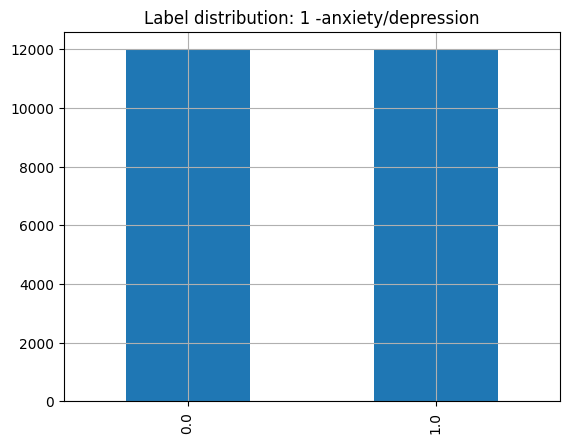

In [70]:
df.label.value_counts().plot(kind='bar')
plt.title('Label distribution: 1 -anxiety/depression')
plt.grid()
plt.show()

In [71]:
from wordcloud import WordCloud


# Preprocessing Text


In [72]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from bs4 import BeautifulSoup

 ## Contraction Mapping

In [73]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [74]:
def text_cleaner(text):
    newString = text.lower()
    newString = BeautifulSoup(newString, "lxml").text
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    newString = re.sub('[m]{2,}', 'mm', newString)
    return newString

In [75]:
print(df)

         label                                               Text
1594182    0.0  Yay, going to Sthlm on Thursday to see Moa, go...
1722       1.0  Arghh! My hands are itchy!! Could it be that o...
6313       1.0  @ohsuperheroine My wife and I have been togeth...
7423       1.0                        school till 5 today  boooo!
1596119    0.0                     @MacTeabird lmao, sounds good 
...        ...                                                ...
1593320    0.0                    Working 9-4 then 311 concert!! 
9010       1.0  Kitty #2 is sitting at the window crying. I th...
1591390    0.0  the UST eng'g building is HOT!  if u know what...
1593161    0.0                              @ZoeAimee yes it is! 
1591660    0.0  @zelciia hehe.. the smell of durians make my m...

[24000 rows x 2 columns]


In [76]:
df['cleaned'] = df["Text"].apply(text_cleaner)

In [77]:
df["Text"]

1594182    Yay, going to Sthlm on Thursday to see Moa, go...
1722       Arghh! My hands are itchy!! Could it be that o...
6313       @ohsuperheroine My wife and I have been togeth...
7423                             school till 5 today  boooo!
1596119                       @MacTeabird lmao, sounds good 
                                 ...                        
1593320                      Working 9-4 then 311 concert!! 
9010       Kitty #2 is sitting at the window crying. I th...
1591390    the UST eng'g building is HOT!  if u know what...
1593161                                @ZoeAimee yes it is! 
1591660    @zelciia hehe.. the smell of durians make my m...
Name: Text, Length: 24000, dtype: object

In [78]:
df['cleaned']

1594182    yay  going to sthlm on thursday to see moa  go...
1722       arghh  my hands are itchy   could it be that o...
6313        ohsuperheroine my wife and i have been togeth...
7423                             school till   today  boooo 
1596119                        macteabird lmao  sounds good 
                                 ...                        
1593320                      working     then     concert   
9010       kitty    is sitting at the window crying  i th...
1591390    the ust eng g building is hot   if u know what...
1593161                                 zoeaimee yes it is  
1591660     zelciia hehe   the smell of durians make my m...
Name: cleaned, Length: 24000, dtype: object


# MACHINE LEARNING MODEL

## Feature Extraction with TF-IDF Vectorizer

In [79]:
X = df.cleaned

In [80]:
#vect = CountVectorizer(ngram_range=(1, 2))
#y = df.label

vect = TfidfVectorizer()

In [81]:
X_cv =vect.fit_transform(X)

In [82]:
train_tfidf = pd.DataFrame(X_cv.toarray(), columns=vect.get_feature_names())
train_tfidf.head()

,aa,aaa,aaaa,aaaaaaaa,aaaaaaaaaah,aaaaaaaaah,aaaaaaw,aaaaaawwwwwwwwwwwwww,aaaaah,aaaaalll,...,zy,zyngapoker,zyrtec,zz,zzap,zzj,zzz,zzzz,zzzzzz,zzzzzzzzzzzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_cv,y,test_size = 0.2,random_state = 50)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV

In [ ]:
def performance_eval(clf,X_test):
    y_pred = clf.predict(X_test)
    print(f'Accuracy : {accuracy_score(x_test,x_pred)}\n')
    print('   ------------ Classification Report -----------')
    print(classification_report(x_test,x_pred))
    print('   ------------ Confusion Matrix -------------- ')
    sns.set(rc={'figure.figsize':(10,6)})
    sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt = 'd')

In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Logistic Regression

In [ ]:
clf_lr = LogisticRegression()
#grid_search = GridSearchCV(clf_lr, param_grid, cv=50)
#grid_search.fit(X_train, y_train)
#best_lr = grid_search.best_estimator_
#performance_eval(best_lr, X_test)
clf_lr.fit(X_train, y_train)
performance_eval(clf_lr,X_test)

# Naive Bayes

In [ ]:
clf_nb = MultinomialNB()
clf_nb.fit(X_train, y_train)
performance_eval(clf_nb,X_test)

# Decision Tree

In [ ]:
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)
performance_eval(clf_dt,X_test)

# AdaBoost

In [ ]:
clf_adb = AdaBoostClassifier(base_estimator=LogisticRegression(), n_estimators=50, random_state=42)
clf_adb.fit(X_train, y_train)
performance_eval(clf_adb,X_test)

# Random Forest

In [ ]:
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)
performance_eval(clf_rf,X_test)

In [ ]:
voting_clf = VotingClassifier(estimators=[('LogReg', clf_lr),('RF', clf_rf),('AdaBoost',clf_adb),('NB',clf_nb),('DT',clf_dt)],voting='hard')
voting_clf.fit(X_train, y_train)
performance_eval(voting_clf,X_test)

In [24]:
import pickle
filename = 'CV_BestModel.sav'
pickle.dump(voting_clf, open(filename, 'wb'))

NameError: name 'voting_clf' is not defined

# RESULT EVALUATION

In [83]:
text = "i am so scared for this paper"

In [84]:
clean_text = text_cleaner(text)

In [85]:
loaded_model = pickle.load(open('CV_BestModel.sav', 'rb'))
single_prediction = loaded_model.predict(vect.transform([clean_text]).toarray())[0]

ValueError: X has 31730 features, but LogisticRegression is expecting 24060 features as input.

In [28]:
output = {0:"No Divergence",
          1:"Possibility of a Divergence"}
print(output[single_prediction])

NameError: name 'single_prediction' is not defined

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

lr_model = LogisticRegression(max_iter=400)
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
mnb_model = MultinomialNB()
ada_model = AdaBoostClassifier()
model_names = ['Logistic Regression','Decision Tree','Random Forest','Naive Bayes', 'AdaBoost']
ml_models = [lr_model,dt_model,rf_model,mnb_model, ada_model]

In [ ]:
trained_ml_models = []
def model_train(model, train_data, train_labels):
    mf = model.fit(train_data,train_labels)
    trained_ml_models.append(mf)
# trained_ml_models = []
for i in ml_models:
    model_train(i,X_train, y_train)
#     trained_ml_models.append(tt)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score

ac_list = []
pr_list = []
re_list = []
f1_list = []

def print_results(md, x_test, y_test, name):
    #print("\n\nClassifier: ", name)
    pred_y = md.predict(x_test)
    true, pred = y_test, pred_y
    ac_list.append((round(accuracy_score(y_test, pred_y),4)*100))
    pr_list.append((round(precision_score(y_test, pred_y, average='weighted'),4)*100)) 
    re_list.append((round(recall_score(y_test, pred_y, average='weighted'),4)*100))
    f1_list.append((round(f1_score(y_test, pred_y, average='weighted'),4)*100))

for i in range(len(trained_ml_models)):
    md = trained_ml_models[i]
    name = model_names[i]
    print_results(md, X_test, y_test, name)

performance_matrix = pd.DataFrame({'Accuracy':ac_list,'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list},
                                  index =model_names)

In [ ]:
performance_matrix.style.set_properties(**{"background-color": "#E5E4E2","color":"BLACK","border": "1.5px  solid black"})

In [ ]:
data_matrix = pd.DataFrame({'Model':model_names,'Accuracy':ac_list,'Precision':pr_list,'Recall':re_list,'F1 Score':f1_list,
},)

In [ ]:
data_matrix.style.set_properties(**{"background-color": "#E5E4E2","color":"BLACK","border": "1.5px  solid black"})

In [ ]:
df_1 = pd.melt(data_matrix, id_vars="Model", var_name="Category", value_name="Values")
plt.figure(figsize=(12, 6))
ax = plt.subplot()

sns.barplot(data=df_1,x='Model', y='Values' ,hue='Category')
ax.set_xlabel('Model') 
ax.set_title('Performance Evaluation')

ax.xaxis.set_ticklabels(model_names, rotation=45);
plt.show()

# User Interface

In [ ]:
!pip install gradio

In [ ]:
import gradio as gr
import pickle

In [ ]:
def predict_ans(text):
    clean_text = text_cleaner(text)
    loaded_model = pickle.load(open('CV_BestModel.sav', 'rb'))
    single_prediction = loaded_model.predict(vect.transform([clean_text]).toarray())[0]
    output = {0:"No psychological divergence", 1:"Possible Psychological divergence"}
    return (output[single_prediction])

In [ ]:
label = gr.outputs.Label()
title = "Predicting Psychological Divergence using social media data"
desc = "Do enter a statement to apply our Model"

gr.Interface(fn=predict_ans, inputs="text", outputs=label,interpretation='default',theme=gr.themes.Glass(),title=title, description=desc).launch(debug='True')